In [ ]:
# Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt
!pip install easyocr

Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17493 (delta 1), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17493/17493), 16.59 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 781.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:0

In [ ]:
import torch
import easyocr
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# Load YOLOv5s model from Ultralytics
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
model.classes = [2, 5, 7]  # Detect only cars, buses, and trucks

# Initialize EasyOCR
reader = easyocr.Reader(['en'])

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-6-19 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 120MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving License_Photo7.jpg to License_Photo7.jpg


In [ ]:
# Read and detect image
img = cv2.imread(image_path)
results = model(img)

# Extract bounding boxes
results.render()
cv2_imshow(results.ims[0])  # Display detections
detections = results.xyxy[0]  # [x1, y1, x2, y2, conf, cls]

print(f"Detected {len(detections)} vehicles")

# OCR on each vehicle detected
for i, det in enumerate(detections):
    x1, y1, x2, y2, _, _ = map(int, det)
    vehicle_crop = img[y1:y2, x1:x2]

    # Convert to grayscale
    gray = cv2.cvtColor(vehicle_crop, cv2.COLOR_BGR2GRAY)

    # Resize to enhance small text
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Apply bilateral filter and thresholding
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    # OCR with EasyOCR
    plate_result = reader.readtext(thresh)

    print(f"\n🚗 Vehicle #{i+1}")
    if plate_result:
        # inside the OCR loop:
        for bbox, text, conf in plate_result:
            if len(text.strip()) >= 5 and conf > 0.5:
                print(f"🔤 Plate Text: {text.strip()} (Confidence: {conf:.2f})")
        else:
            print("⚠️ No plate text detected.")

    cv2_imshow(vehicle_crop)

Output hidden; open in https://colab.research.google.com to view.

In [1]:
!pip install yolov5 easyocr  # from PyPI, includes torch

# Load a pretrained YOLOv5 model specialized for license plate detection
from yolov5 import load
model_lp = load('keremberke/yolov5m-license-plate')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━

config.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/42.1M [00:00<?, ?B/s]

In [11]:
from google.colab import files
uploaded = files.upload()
img_path = next(iter(uploaded))
import cv2
img = cv2.imread(img_path)
display(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Saving License_Photo5.jpg to License_Photo5.jpg


array([[[23, 26, 41],
        [20, 26, 40],
        [21, 27, 41],
        ...,
        [22, 29, 45],
        [20, 26, 42],
        [20, 27, 45]],

       [[20, 26, 42],
        [21, 28, 44],
        [19, 25, 41],
        ...,
        [21, 28, 44],
        [19, 26, 42],
        [21, 26, 45]],

       [[18, 25, 41],
        [21, 28, 44],
        [22, 28, 44],
        ...,
        [21, 29, 42],
        [22, 30, 43],
        [22, 30, 43]],

       ...,

       [[18, 26, 39],
        [17, 23, 37],
        [21, 27, 41],
        ...,
        [28, 30, 43],
        [29, 29, 41],
        [30, 28, 41]],

       [[18, 28, 40],
        [17, 25, 38],
        [21, 27, 41],
        ...,
        [30, 30, 42],
        [29, 29, 41],
        [25, 27, 39]],

       [[19, 27, 40],
        [19, 25, 39],
        [22, 28, 42],
        ...,
        [23, 25, 37],
        [22, 24, 36],
        [21, 23, 35]]], dtype=uint8)

In [12]:
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

# Detect plates only
results = model_lp(img)
results.render()
cv2_imshow(results.ims[0])

# Run OCR only on crop
reader = easyocr.Reader(['en'])
detections = results.pred[0]  # [x1,y1,x2,y2,conf,cls]

for *box, conf, cls in detections.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]

    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )


    plate_res = reader.readtext(thresh)
    text = max(plate_res, key=lambda x: x[2])[1] if plate_res else "[not found]"
    print("🔤 Plate Text:", text.strip())
    cv2_imshow(plate_crop)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
import urllib.request
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return img

In [25]:
# Example license plate image URL (you can replace this)
image_url = "https://www.driving.co.uk/wp-content/uploads/sites/5/2020/12/Green-number-plates.jpg"

img = read_image_from_url(image_url)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

# Detect plates only
results = model_lp(img)
results.render()
cv2_imshow(results.ims[0])

# Run OCR only on crop
reader = easyocr.Reader(['en'])
detections = results.pred[0]  # [x1,y1,x2,y2,conf,cls]

for *box, conf, cls in detections.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]

    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )


    plate_res = reader.readtext(thresh)
    text = max(plate_res, key=lambda x: x[2])[1] if plate_res else "[not found]"
    print("🔤 Plate Text:", text.strip())
    cv2_imshow(plate_crop)

Output hidden; open in https://colab.research.google.com to view.

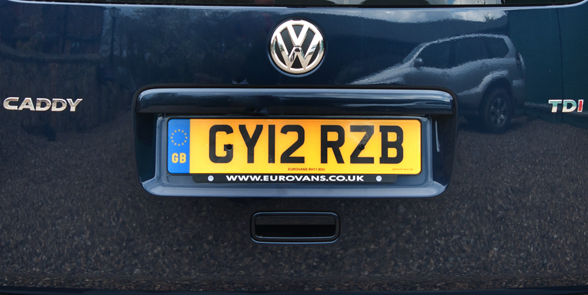

In [32]:
# Example license plate image URL (you can replace this)
image_url = "https://www.ilovemeetandgreet.co.uk/media/u4le2gvk/number-plates-explained-with-ilmg.jpg"

img = read_image_from_url(image_url)
cv2_imshow(img)

/usr/local/lib/python3.11/dist-packages/yolov5/models/common.py:709: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


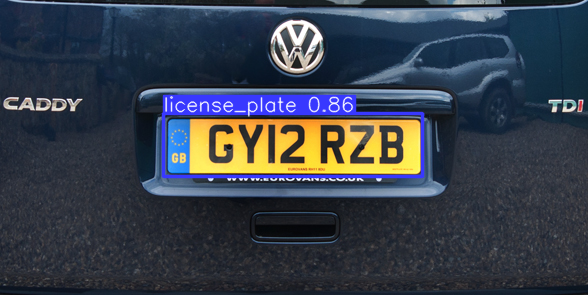

🔤 Plate Text: GYI2 RZB


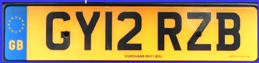

In [33]:
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

# Detect plates only
results = model_lp(img)
results.render()
cv2_imshow(results.ims[0])

# Run OCR only on crop
reader = easyocr.Reader(['en'])
detections = results.pred[0]  # [x1,y1,x2,y2,conf,cls]

for *box, conf, cls in detections.cpu().numpy():
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]

    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    thresh = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )


    plate_res = reader.readtext(thresh)
    text = max(plate_res, key=lambda x: x[2])[1] if plate_res else "[not found]"
    print("🔤 Plate Text:", text.strip())
    cv2_imshow(plate_crop)

In [2]:
!pip install easyocr -q
!pip install opencv-python-headless -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import easyocr

🚗 License Plate: DL7C01939 (Confidence: 0.32)


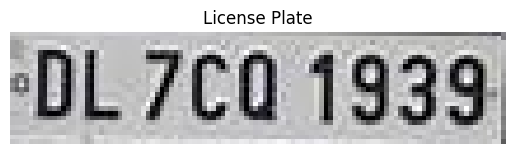

In [13]:
import re

# Read image from URL
def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Enhance the license plate image
def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    return blur

# License plate reading pipeline
def read_license_plate(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_detected = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            # Crop region
            x_min = int(min(bbox[0][0], bbox[1][0]))
            y_min = int(min(bbox[0][1], bbox[2][1]))
            x_max = int(max(bbox[2][0], bbox[3][0]))
            y_max = int(max(bbox[1][1], bbox[3][1]))

            plate_img = img[y_min:y_max, x_min:x_max]
            enhanced = enhance_image(plate_img)

            # OCR on crop
            result = reader.readtext(enhanced)
            for (_, plate_text, conf2) in result:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
                plt.title("License Plate")
                plt.axis('off')
                plt.show()

                plate_detected = True
                break
        if plate_detected:
            break

    if not plate_detected:
        print("❌ No valid license plate detected.")

# 🔗 Example image
read_license_plate("https://tse1.mm.bing.net/th?id=OIP.Qi94-0Y2XvG9vBOU75XUHAHaEk&pid=Api&P=0&h=220")

🚗 License Plate: HRZSDK8337 (Confidence: 0.48)


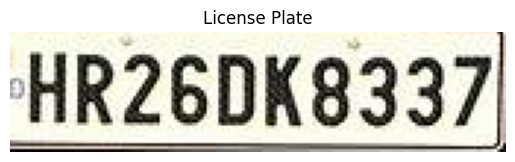

In [15]:
import re

# Read image from URL
def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Enhance the license plate image
def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    return blur

# License plate reading pipeline
def read_license_plate(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_detected = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            # Crop region
            x_min = int(min(bbox[0][0], bbox[1][0]))
            y_min = int(min(bbox[0][1], bbox[2][1]))
            x_max = int(max(bbox[2][0], bbox[3][0]))
            y_max = int(max(bbox[1][1], bbox[3][1]))

            plate_img = img[y_min:y_max, x_min:x_max]
            enhanced = enhance_image(plate_img)

            # OCR on crop
            result = reader.readtext(enhanced)
            for (_, plate_text, conf2) in result:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
                plt.title("License Plate")
                plt.axis('off')
                plt.show()

                plate_detected = True
                break
        if plate_detected:
            break

    if not plate_detected:
        print("❌ No valid license plate detected.")

# 🔗 Example image
read_license_plate("https://tse4.mm.bing.net/th?id=OIP.M-c7envPT8iSqyczLbtGigHaE2&pid=Api&P=0&h=220")

🚗 License Plate: KAG2MP9657 (Confidence: 0.79)


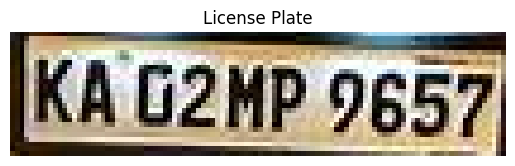

In [16]:
import re

# Read image from URL
def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Enhance the license plate image
def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    return blur

# License plate reading pipeline
def read_license_plate(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_detected = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            # Crop region
            x_min = int(min(bbox[0][0], bbox[1][0]))
            y_min = int(min(bbox[0][1], bbox[2][1]))
            x_max = int(max(bbox[2][0], bbox[3][0]))
            y_max = int(max(bbox[1][1], bbox[3][1]))

            plate_img = img[y_min:y_max, x_min:x_max]
            enhanced = enhance_image(plate_img)

            # OCR on crop
            result = reader.readtext(enhanced)
            for (_, plate_text, conf2) in result:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
                plt.title("License Plate")
                plt.axis('off')
                plt.show()

                plate_detected = True
                break
        if plate_detected:
            break

    if not plate_detected:
        print("❌ No valid license plate detected.")

# 🔗 Example image
read_license_plate("https://tse3.mm.bing.net/th?id=OIP.0jQO9av472X7tN7ejTUi2AHaFj&pid=Api&P=0&h=220")

🚗 License Plate: 4H200Y2366 (Confidence: 0.18)


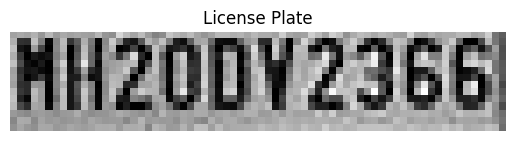

In [19]:
import re

# Read image from URL
def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

# Enhance the license plate image
def enhance_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    return blur

# License plate reading pipeline
def read_license_plate(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_detected = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            # Crop region
            x_min = int(min(bbox[0][0], bbox[1][0]))
            y_min = int(min(bbox[0][1], bbox[2][1]))
            x_max = int(max(bbox[2][0], bbox[3][0]))
            y_max = int(max(bbox[1][1], bbox[3][1]))

            plate_img = img[y_min:y_max, x_min:x_max]
            enhanced = enhance_image(plate_img)

            # OCR on crop
            result = reader.readtext(enhanced)
            for (_, plate_text, conf2) in result:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
                plt.title("License Plate")
                plt.axis('off')
                plt.show()

                plate_detected = True
                break
        if plate_detected:
            break

    if not plate_detected:
        print("❌ No valid license plate detected.")

# 🔗 Example image
read_license_plate("https://tse4.mm.bing.net/th?id=OIP.qp1s_g3osYQOj6TMJg3P1gHaEO&pid=Api&P=0&h=220")

In [22]:
!pip install imutils -q

🚗 License Plate: HR260K8337 (Confidence: 0.56)


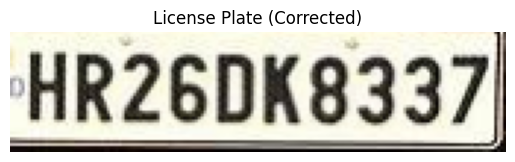

In [28]:
import imutils

def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

def order_points(pts):
    # Order bounding box points: top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(np.array(pts))
    (tl, tr, br, bl) = rect

    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = int(max(widthA, widthB))

    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = int(max(heightA, heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    return cv2.warpPerspective(image, M, (maxWidth, maxHeight))

def preprocess_plate(plate_img):
    plate_img = cv2.resize(plate_img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 25, 15)
    return thresh

def read_license_plate_enhanced(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_found = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            plate = four_point_transform(img, bbox)
            preprocessed = preprocess_plate(plate)
            ocr_results = reader.readtext(preprocessed)

            for (_, plate_text, conf2) in ocr_results:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
                plt.title("License Plate (Corrected)")
                plt.axis('off')
                plt.show()

                plate_found = True
                break
        if plate_found:
            break

    if not plate_found:
        print("❌ No valid license plate detected.")

# Example test
read_license_plate_enhanced("https://tse4.mm.bing.net/th?id=OIP.M-c7envPT8iSqyczLbtGigHaE2&pid=Api&P=0&h=220")

🚗 License Plate: AP29 (Confidence: 0.79)


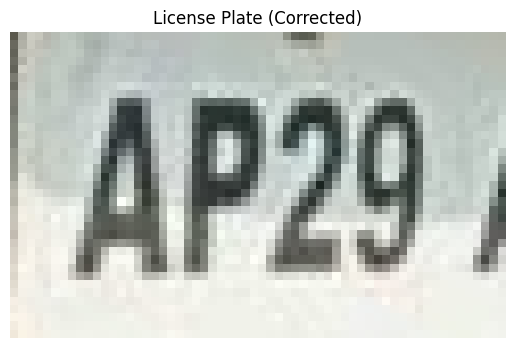

In [29]:
import imutils

def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

def order_points(pts):
    # Order bounding box points: top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(np.array(pts))
    (tl, tr, br, bl) = rect

    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = int(max(widthA, widthB))

    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = int(max(heightA, heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    return cv2.warpPerspective(image, M, (maxWidth, maxHeight))

def preprocess_plate(plate_img):
    plate_img = cv2.resize(plate_img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 25, 15)
    return thresh

def read_license_plate_enhanced(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_found = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            plate = four_point_transform(img, bbox)
            preprocessed = preprocess_plate(plate)
            ocr_results = reader.readtext(preprocessed)

            for (_, plate_text, conf2) in ocr_results:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
                plt.title("License Plate (Corrected)")
                plt.axis('off')
                plt.show()

                plate_found = True
                break
        if plate_found:
            break

    if not plate_found:
        print("❌ No valid license plate detected.")

# Example test
read_license_plate_enhanced("https://tse4.mm.bing.net/th?id=OIP.fl2XUFCqpvrRU8TRTZ4ZMAHaDv&pid=Api&P=0&h=220")

🚗 License Plate: 4659407515 (Confidence: 0.11)


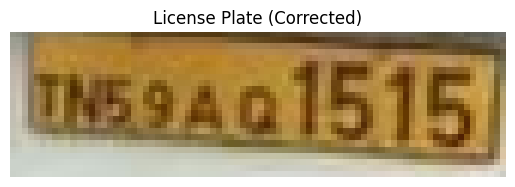

In [32]:
import imutils

def read_image_from_url(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    return cv2.imdecode(image, cv2.IMREAD_COLOR)

def order_points(pts):
    # Order bounding box points: top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    return rect

def four_point_transform(image, pts):
    rect = order_points(np.array(pts))
    (tl, tr, br, bl) = rect

    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = int(max(widthA, widthB))

    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = int(max(heightA, heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    return cv2.warpPerspective(image, M, (maxWidth, maxHeight))

def preprocess_plate(plate_img):
    plate_img = cv2.resize(plate_img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 25, 15)
    return thresh

def read_license_plate_enhanced(image_url):
    img = read_image_from_url(image_url)
    reader = easyocr.Reader(['en'])
    detections = reader.readtext(img)

    plate_found = False
    for (bbox, text, conf) in detections:
        if conf > 0.3 and 5 <= len(text) <= 12:
            plate = four_point_transform(img, bbox)
            preprocessed = preprocess_plate(plate)
            ocr_results = reader.readtext(preprocessed)

            for (_, plate_text, conf2) in ocr_results:
                clean = re.sub(r'[^A-Z0-9]', '', plate_text.upper())
                print(f"🚗 License Plate: {clean} (Confidence: {round(conf2, 2)})")

                plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
                plt.title("License Plate (Corrected)")
                plt.axis('off')
                plt.show()

                plate_found = True
                break
        if plate_found:
            break

    if not plate_found:
        print("❌ No valid license plate detected.")

# Example test
read_license_plate_enhanced("https://tse3.mm.bing.net/th?id=OIP.cL3aLhnn3o-d69Wv9hLufgHaEK&pid=Api&P=0&h=220")